
Epoch 0
Hypothesis [[ 0.48712057  0.51287943]
 [ 0.3380821   0.66191792]
 [ 0.65063184  0.34936813]
 [ 0.5031724   0.49682763]]
w1=[[-0.79593647  0.93947881]
 [ 0.68854761 -0.89423609]]
b1=[-0.00733338  0.00893857]
w2=[[-0.79084051  0.93289936]
 [ 0.69278169 -0.8986907 ]]
b2=[ 0.00394399 -0.00394398]
cost (ce)=2.87031


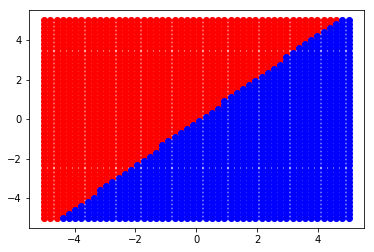


Epoch 10000
Hypothesis [[ 0.99773693  0.00226305]
 [ 0.00290443  0.99709558]
 [ 0.00295531  0.99704474]
 [ 0.99804318  0.00195681]]
w1=[[-6.62694883  7.52302551]
 [ 6.91208267 -7.39292049]]
b1=[ 3.32245088  3.76204109]
w2=[[ 6.63464451 -6.49259472]
 [ 6.40471601 -6.61061907]]
b2=[-9.65064335  9.65065002]
cost (ce)=0.0100926


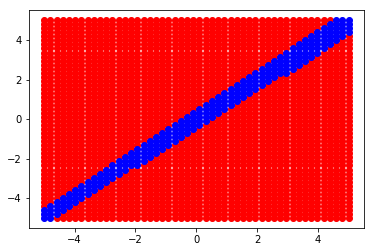


Epoch 20000
Hypothesis [[  9.98954773e-01   1.04520307e-03]
 [  1.35455513e-03   9.98645484e-01]
 [  1.37042650e-03   9.98629570e-01]
 [  9.99092221e-01   9.07784502e-04]]
w1=[[-7.04857349  7.84673071]
 [ 7.33061361 -7.6883769 ]]
b1=[ 3.53246331  3.89587522]
w2=[[ 7.35947943 -7.21742964]
 [ 7.14059544 -7.34649324]]
b2=[-10.74944305  10.7494421 ]
cost (ce)=0.00468077


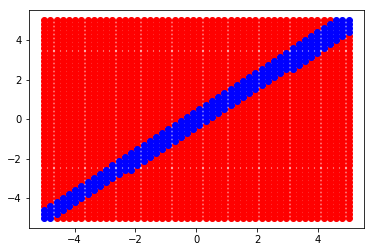

In [2]:
#!/usr/bin/env python
#[2017-6-30]tensorflow解异或问题：https://martin-thoma.com/tf-xor-tutorial/
"""
Solve the XOR problem with Tensorflow.
The XOR problem is a two-class classification problem. You only have four
datapoints, all of which are given during training time. Each datapoint has
two features:
      x o
      o x
As you can see, the classifier has to learn a non-linear transformation of
the features to find a propper decision boundary.
"""

__author__ = "Martin Thoma"
__email__ = "info@martin-thoma.de"

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder


def trans_for_ohe(labels):
    """Transform a flat list of labels to what one hot encoder needs."""
    return np.array(labels).reshape(len(labels), -1)


def analyze_classifier(sess, i, w1, b1, w2, b2, XOR_X, XOR_T):
    """Visualize the classification."""
    print('\nEpoch %i' % i)
    print('Hypothesis %s' % sess.run(hypothesis,feed_dict={input_: XOR_X,target: XOR_T}))
    print('w1=%s' % sess.run(w1))
    print('b1=%s' % sess.run(b1))
    print('w2=%s' % sess.run(w2))
    print('b2=%s' % sess.run(b2))
    print('cost (ce)=%s' % sess.run(cross_entropy,feed_dict={input_: XOR_X,target: XOR_T}))
    # Visualize classification boundary
    xs = np.linspace(-5, 5)
    ys = np.linspace(-5, 5)
    pred_classes = []
    for x in xs:
        for y in ys:
            pred_class = sess.run(hypothesis,
                                  feed_dict={input_: [[x, y]]})
            pred_classes.append((x, y, pred_class.argmax()))
    xs_p, ys_p = [], []
    xs_n, ys_n = [], []
    for x, y, c in pred_classes:
        if c == 0:
            xs_n.append(x)
            ys_n.append(y)
        else:
            xs_p.append(x)
            ys_p.append(y)
    plt.plot(xs_p, ys_p, 'ro', xs_n, ys_n, 'bo')
    plt.show()


# The training data
XOR_X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # Features
XOR_Y = [0, 1, 1, 0]  # Class labels
assert len(XOR_X) == len(XOR_Y)  # sanity check

# Transform labels to targets
enc = OneHotEncoder()
enc.fit(trans_for_ohe(XOR_Y))
XOR_T = enc.transform(trans_for_ohe(XOR_Y)).toarray()

# The network
nb_classes = 2
input_ = tf.placeholder(tf.float32,shape=[None, len(XOR_X[0])],name="input")
target = tf.placeholder(tf.float32,shape=[None, nb_classes],name="output")
nb_hidden_nodes = 2
# enc = tf.one_hot([0, 1], 2)
w1 = tf.Variable(tf.random_uniform([2, nb_hidden_nodes], -1, 1, seed=0),name="Weights1")
w2 = tf.Variable(tf.random_uniform([nb_hidden_nodes, nb_classes], -1, 1,seed=0),name="Weights2")
b1 = tf.Variable(tf.zeros([nb_hidden_nodes]), name="Biases1")
b2 = tf.Variable(tf.zeros([nb_classes]), name="Biases2")
activation2 = tf.sigmoid(tf.matmul(input_, w1) + b1)
hypothesis = tf.nn.softmax(tf.matmul(activation2, w2) + b2)
cross_entropy = -tf.reduce_sum(target * tf.log(hypothesis))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# Start training
#init = tf.initialize_all_variables()#此方法已于2017-3-2删除
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

    for i in range(20001):
        sess.run(train_step, feed_dict={input_: XOR_X, target: XOR_T})

        if i % 10000 == 0:
            analyze_classifier(sess, i, w1, b1, w2, b2, XOR_X, XOR_T)

# 异或难题
- minsky：异或门是神经网络的命门——诱发神经网络的第一次衰落
## 问题介绍
异或逻辑
![图](https://aimatters.files.wordpress.com/2015/12/xor-graph.png?w=809![image.png](attachment:image.png))
## TensorFlow代码实现
以下代码来自：
- [Solving XOR with a Neural Network in TensorFlow](https://aimatters.wordpress.com/2016/01/16/solving-xor-with-a-neural-network-in-tensorflow/)
## 网络结构图（TensorBoard可视化）：
![结构图](https://aimatters.files.wordpress.com/2016/01/tf_graph.png?w=809![image.png](attachment:image.png)
### We can see that our inputs x-input and y-input are the starts of the graph, and that they flow through the processes at layer2 and layer3, ultimately being used in the cost function.

In [ ]:
#方法二：https://aimatters.wordpress.com/2016/01/16/solving-xor-with-a-neural-network-in-tensorflow/
#There is one thing I did notice in putting this together: it’s quite slow. 
#In Octave, I was able to run 10,000 epochs in about 9.5 seconds. 
#The Python/NumPy example was able to run in 5.8 seconds. 
#The above TensorFlow example runs in about 28 seconds on my laptop.
import tensorflow as tf
import time

x_ = tf.placeholder(tf.float32, shape=[4,2], name = 'x-input')
y_ = tf.placeholder(tf.float32, shape=[4,1], name = 'y-input')

Theta1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name = "Theta1")
Theta2 = tf.Variable(tf.random_uniform([2,1], -1, 1), name = "Theta2")

Bias1 = tf.Variable(tf.zeros([2]), name = "Bias1")
Bias2 = tf.Variable(tf.zeros([1]), name = "Bias2")

with tf.name_scope("layer2") as scope:
    A2 = tf.sigmoid(tf.matmul(x_, Theta1) + Bias1)

with tf.name_scope("layer3") as scope:
    Hypothesis = tf.sigmoid(tf.matmul(A2, Theta2) + Bias2)

with tf.name_scope("cost") as scope:
    cost = tf.reduce_mean(( (y_ * tf.log(Hypothesis)) + ((1 - y_) * tf.log(1.0 - Hypothesis)) ) * -1)

with tf.name_scope("train") as scope:
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

XOR_X = [[0,0],[0,1],[1,0],[1,1]]
XOR_Y = [[0],[1],[1],[0]]

#init = tf.initialize_all_variables()
init = tf.global_variables_initializer()
sess = tf.Session()

writer = tf.summary.FileWriter("./logs/xor_logs", sess.graph_def)

sess.run(init)

t_start = time.clock()
for i in range(100000):
    sess.run(train_step, feed_dict={x_: XOR_X, y_: XOR_Y})
    if i % 1000 == 0:
        print('Epoch ', i)
        print('Hypothesis ', sess.run(Hypothesis, feed_dict={x_: XOR_X, y_: XOR_Y}))
        print('Theta1 ', sess.run(Theta1))
        print('Bias1 ', sess.run(Bias1))
        print('Theta2 ', sess.run(Theta2))
        print('Bias2 ', sess.run(Bias2))
        print('cost ', sess.run(cost, feed_dict={x_: XOR_X, y_: XOR_Y}))
t_end = time.clock()
print('Elapsed time ', t_end - t_start)

# tensorboard使用介绍
[参考](http://blog.csdn.net/jerry81333/article/details/53004903)

## TensorFlow深度学习笔记 Tensorboard入门
转载请注明作者：梦里风林
Github工程地址：https://github.com/ahangchen/GDLnotes
官方教程：https://www.tensorflow.org/versions/master/how_tos/graph_viz/index.html
TensorFlow自带的一个强大的可视化工具

### 功能

这是TensorFlow在MNIST实验数据上得到Tensorboard结果

- Event: 展示训练过程中的统计数据（最值，均值等）变化情况
- Image: 展示训练过程中记录的图像
- Audio: 展示训练过程中记录的音频
- Histogram: 展示训练过程中记录的数据的分布图
### 原理

- 在运行过程中，记录结构化的数据
- 运行一个本地服务器，监听6006端口
- 请求时，分析记录的数据，绘制
### 实现

在构建graph的过程中，记录你想要追踪的Tensor
```python
with tf.name_scope('output_act'):
    hidden = tf.nn.relu6(tf.matmul(reshape, output_weights[0]) + output_biases)
    tf.histogram_summary('output_act', hidden)
```
其中，

- histogram_summary用于生成分布图，也可以用scalar_summary记录存数值
- 使用scalar_summary的时候，tag和tensor的shape要一致
- name_scope可以不写，但是当你需要在Graph中体现tensor之间的包含关系时，就要写了，像下面这样：
```python
with tf.name_scope('input_cnn_filter'):
    with tf.name_scope('input_weight'):
        input_weights = tf.Variable(tf.truncated_normal(
            [patch_size, patch_size, num_channels, depth], stddev=0.1), name='input_weight')
        variable_summaries(input_weights, 'input_cnn_filter/input_weight')
    with tf.name_scope('input_biases'):
        input_biases = tf.Variable(tf.zeros([depth]), name='input_biases')
        variable_summaries(input_weights, 'input_cnn_filter/input_biases')
```
在Graph中会体现为一个input_cnn_filter，可以点开，里面有weight和biases
用summary系列函数记录后，Tensorboard会根据graph中的依赖关系在Graph标签中展示对应的图结构
官网封装了一个函数，可以调用来记录很多跟某个Tensor相关的数据：
```python
def variable_summaries(var, name):
    """Attach a lot of summaries to a Tensor."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.scalar_summary('mean/' + name, mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_sum(tf.square(var - mean)))
        tf.scalar_summary('sttdev/' + name, stddev)
        tf.scalar_summary('max/' + name, tf.reduce_max(var))
        tf.scalar_summary('min/' + name, tf.reduce_min(var))
        tf.histogram_summary(name, var)
```
只有这样记录国max和min的Tensor才会出现在Event里面
Graph的最后要写一句这个，给session回调
```python 
merged = tf.merge_all_summaries()
```
Session 中调用

构造两个writer，分别在train和valid的时候写数据：
```python
train_writer = tf.train.SummaryWriter(summary_dir + '/train',
                                              session.graph)
valid_writer = tf.train.SummaryWriter(summary_dir + '/valid')
```
这里的summary_dir存放了运行过程中记录的数据，等下启动服务器要用到
构造run_option和run_meta，在每个step运行session时进行设置：
summary, _, l, predictions = 
    session.run([merged, optimizer, loss, train_prediction], options=run_options, feed_dict=feed_dict)
注意要把merged拿回来，并且设置options
在每次训练时，记一次：
train_writer.add_summary(summary, step)
在每次验证时，记一次：
valid_writer.add_summary(summary, step)
达到一定训练次数后，记一次meta做一下标记
train_writer.add_run_metadata(run_metadata, 'step%03d' % step)
查看可视化结果

启动TensorBoard服务器：
python安装路径/python TensorFlow安装路径/tensorflow/tensorboard/tensorboard.py --logdir=path/to/log-directory
注意这个python必须是安装了TensorFlow的python，tensorboard.py必须制定路径才能被python找到，logdir必须是前面创建两个writer时使用的路径

比如我的是：

/home/cwh/anaconda2/envs/tensorflow/bin/python /home/cwh/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/tensorboard/tensorboard.py --logdir=~/coding/python/GDLnotes/src/convnet/summary
使用python

然后在浏览器输入 http://127.0.0.1:6006 就可以访问到tensorboard的结果
强迫症踩坑后记

之前我的cnn代码里有valid_prediction，所以画出来的graph有两条分支，不太清晰，所以只留了train一个分支
修改前：


多分支graph
修改后：


单分支graph
多用with，进行包裹，这样才好看，正如官网说的，你的summary代码决定了你的图结构
不是所有的tensor都有必要记录，但是Variable和placeholder最好都用summary记录一下，也是为了好看
由于有了gradient的计算，所以与gradient计算相关的都会被拎出来，下次试一下用其他optimizer
我的CNN TensorBoard代码：cnn_board.py

参考资料
mnist_with_summaries.py


In [ ]:
#tensorboard测试,参考:http://blog.csdn.net/jerry81333/article/details/53004903
import tensorflow as tf    
import numpy as np    
    
def add_layer(inputs,in_size,out_size,n_layer,activation_function=None): #activation_function=None线性函数    
    layer_name="layer%s" % n_layer    
    with tf.name_scope(layer_name):    
        with tf.name_scope('weights'):    
            Weights = tf.Variable(tf.random_normal([in_size,out_size])) #Weight中都是随机变量    
            tf.summary.histogram(layer_name+"/weights",Weights) #可视化观看变量    
        with tf.name_scope('biases'):    
            biases = tf.Variable(tf.zeros([1,out_size])+0.1) #biases推荐初始值不为0    
            tf.summary.histogram(layer_name+"/biases",biases) #可视化观看变量    
        with tf.name_scope('Wx_plus_b'):    
            Wx_plus_b = tf.matmul(inputs,Weights)+biases #inputs*Weight+biases    
            tf.summary.histogram(layer_name+"/Wx_plus_b",Wx_plus_b) #可视化观看变量    
        if activation_function is None:    
            outputs = Wx_plus_b    
        else:    
            outputs = activation_function(Wx_plus_b)    
        tf.summary.histogram(layer_name+"/outputs",outputs) #可视化观看变量    
        return outputs    
    
#创建数据x_data，y_data    
x_data = np.linspace(-1,1,300)[:,np.newaxis] #[-1,1]区间，300个单位，np.newaxis增加维度    
noise = np.random.normal(0,0.05,x_data.shape) #噪点    
y_data = np.square(x_data)-0.5+noise    
    
with tf.name_scope('inputs'): #结构化    
    xs = tf.placeholder(tf.float32,[None,1],name='x_input')    
    ys = tf.placeholder(tf.float32,[None,1],name='y_input')    
    
#三层神经，输入层（1个神经元），隐藏层（10神经元），输出层（1个神经元）    
l1 = add_layer(xs,1,10,n_layer=1,activation_function=tf.nn.relu) #隐藏层    
prediction = add_layer(l1,10,1,n_layer=2,activation_function=None) #输出层    
    
#predition值与y_data差别    
with tf.name_scope('loss'):    
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1])) #square()平方,sum()求和,mean()平均值    
    tf.summary.scalar('loss',loss) #可视化观看常量    
with tf.name_scope('train'):    
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss) #0.1学习效率,minimize(loss)减小loss误差    
    
init = tf.initialize_all_variables()    
sess = tf.Session()    
#合并到Summary中    
merged = tf.summary.merge_all()    
#选定可视化存储目录    
writer = tf.summary.FileWriter("Desktop/",sess.graph)    
sess.run(init) #先执行init    
    
#训练1k次    
for i in range(1000):    
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})    
    if i%50==0:    
        result = sess.run(merged,feed_dict={xs:x_data,ys:y_data}) #merged也是需要run的    
        writer.add_summary(result,i) #result是summary类型的，需要放入writer中，i步数（x轴）